# В этом уроке мы рассмотрим крайне важную часть анализа данных - визуализацию

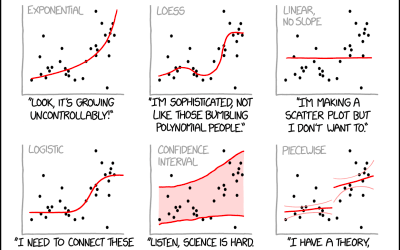

Полезные ссылки:

- [matplotlib](https://matplotlib.org/)
- [встроенная в pandas визуализация](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
- [seaborn](https://seaborn.pydata.org/)

In [1]:
import numpy as np 
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
students_performance = pd.read_csv('data/StudentsPerformance.csv')
students_performance.columns = students_performance.columns.str.replace(' ', '_')

In [4]:
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:>

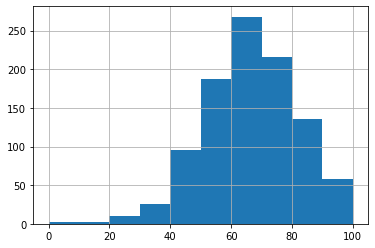

In [5]:
students_performance.math_score.hist()

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

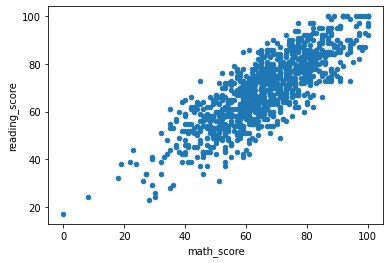

In [6]:
students_performance.plot.scatter(x='math_score', y='reading_score')

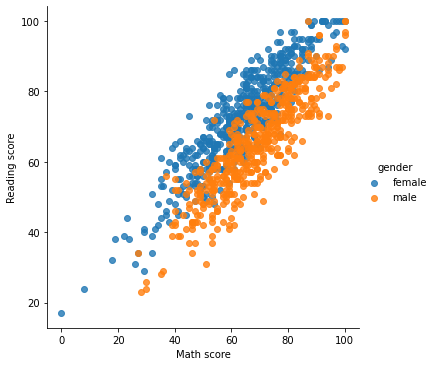

In [7]:
# hue - группировка по признаку
# fit_reg -  регрессионная прямая
ax = sns.lmplot(x='math_score', y='reading_score', hue='gender', data=students_performance, fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

# Вопрос
Представьте, что у вас есть датафрэйм df, хранящий данные о зарплате за месяц, со всего 1-ой колонкой income.

Укажите верные способы, как отрисовать простой график зависимости зарплаты от даты (то, как отображается дата сейчас не важно, главное сам график)

Убедитесь, что вы используте версию seaborn > = 0.9.


In [8]:
sns.__version__

'0.11.1'

In [9]:
df = pd.read_csv('data/income.csv')

In [10]:
df.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


<AxesSubplot:>

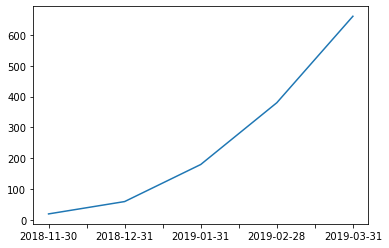

In [11]:
df['income'].plot()

<AxesSubplot:>

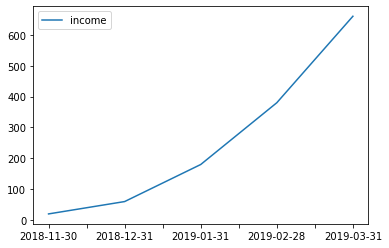

In [12]:
df.plot(kind='line')

<AxesSubplot:>

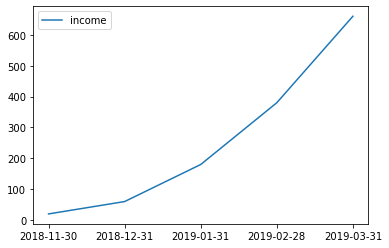

In [13]:
sns.lineplot(data=df) 

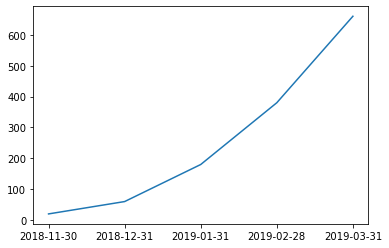

In [14]:
plt.plot(df.index, df.income)

<AxesSubplot:>

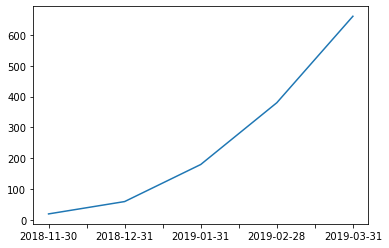

In [15]:
df.income.plot()

<AxesSubplot:ylabel='income'>

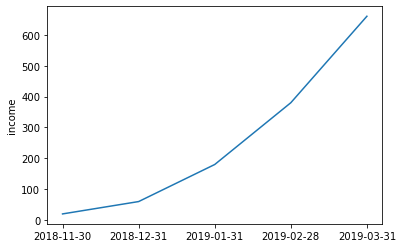

In [16]:
sns.lineplot(x=df.index, y=df.income)

<AxesSubplot:>

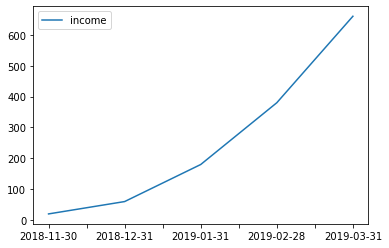

In [17]:
df.plot()

# Задание 

Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.

В ответе вы должны указать число кластеров в виде числа (например: 3).

In [18]:
df = pd.read_csv('data/dataset_209770_6.txt', sep=" ")

In [19]:
df.head()

,x,y
0,700.462788,1302.706511
1,997.305494,1099.298387
2,1187.671696,1483.740392
3,188.874196,600.661244
4,808.154505,188.609964


<AxesSubplot:xlabel='x', ylabel='y'>

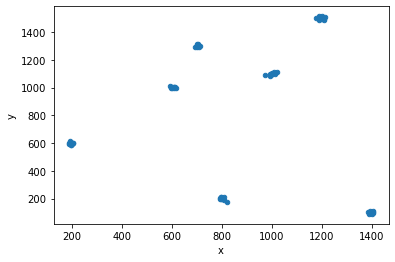

In [20]:
df.plot.scatter(x='x', y='y')

<AxesSubplot:xlabel='x', ylabel='y'>

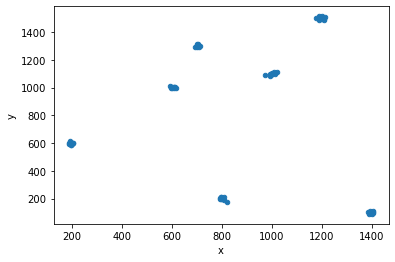

In [21]:
pd.read_csv('data/dataset_209770_6.txt', sep=' ') \
    .plot(x='x', y='y', kind='scatter')

# Вопрос 

Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует скачанным данным.

Чтобы график отображался как на картинках, добавьте

```python
g = # ваш код для создания теплокарты, укажите параметр cmap="viridis" для той же цветовой схемы
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)
```

In [22]:
# Если изначально при чтении указать индексом 0 столбец,
# то при вызове плотера графика он сам без помощи разберется как строить график.
df1 = pd.read_csv('data/genome_matrix.csv', index_col=0)

In [23]:
df1.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


In [24]:
df1.style.background_gradient(cmap='viridis')

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


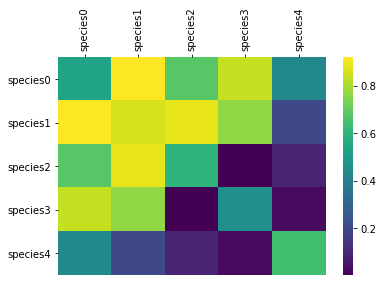

In [25]:
g = sns.heatmap(df1, cmap="viridis")
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

# Вопрос

Пришло время узнать, какая роль в dota самая распространённая. Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

Это задание можно выполнить многими путями, и рисовать гистограмму вообще говоря для этого не нужно.

In [26]:
df2 = pd.read_csv('data/dota_hero_stats.csv')
df2.roles

0                           ['Carry', 'Escape', 'Nuker']
1        ['Initiator', 'Durable', 'Disabler', 'Jungler']
2            ['Support', 'Disabler', 'Nuker', 'Durable']
3      ['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...
4            ['Support', 'Disabler', 'Nuker', 'Jungler']
                             ...                        
112         ['Carry', 'Escape', 'Disabler', 'Initiator']
113           ['Support', 'Nuker', 'Disabler', 'Escape']
114    ['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc...
115           ['Support', 'Nuker', 'Disabler', 'Escape']
116        ['Carry', 'Initiator', 'Disabler', 'Durable']
Name: roles, Length: 117, dtype: object

In [32]:
df2.roles.str.split(',')

0                       [['Carry',  'Escape',  'Nuker']]
1      [['Initiator',  'Durable',  'Disabler',  'Jung...
2       [['Support',  'Disabler',  'Nuker',  'Durable']]
3      [['Carry',  'Disabler',  'Jungler',  'Nuker', ...
4       [['Support',  'Disabler',  'Nuker',  'Jungler']]
                             ...                        
112    [['Carry',  'Escape',  'Disabler',  'Initiator']]
113      [['Support',  'Nuker',  'Disabler',  'Escape']]
114    [['Carry',  'Nuker',  'Disabler',  'Durable', ...
115      [['Support',  'Nuker',  'Disabler',  'Escape']]
116    [['Carry',  'Initiator',  'Disabler',  'Durabl...
Name: roles, Length: 117, dtype: object

In [33]:
df2.roles.str.split(',').apply(len)

0      3
1      4
2      4
3      5
4      4
      ..
112    4
113    4
114    6
115    4
116    4
Name: roles, Length: 117, dtype: int64

In [34]:
df2.roles.str.split(',').apply(len).mode()

0    4
dtype: int64

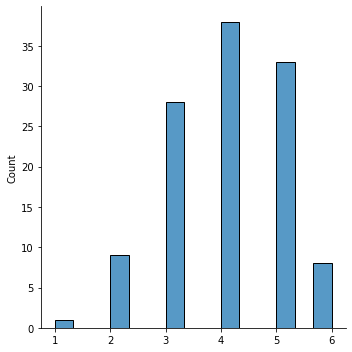

In [29]:
sns.displot([x.count(',')+1 for x in df2.roles], bins=15)

# Вопрос

Теперь перейдём к цветочкам. Магистрантка Адель решила изучить какие бывают ирисы. Помогите Адель узнать об ирисах больше - скачайте датасэт со значениями параметров ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график.

Распределение должно быть по всем образцам, без разделения на вид.
Чтобы построить на 1-ом графике распределения для каждого из параметров, можно воспользоваться петлёй

```python
for column in df:
    # Draw distribution with that column
```

Ссылки для изучения:

[kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

[distributions](http://seaborn.pydata.org/tutorial/distributions.html)

In [35]:
iris_df = pd.read_csv('data/iris.csv', index_col=0)
iris = iris_df.drop(['species'], axis=1)
iris.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:ylabel='Density'>

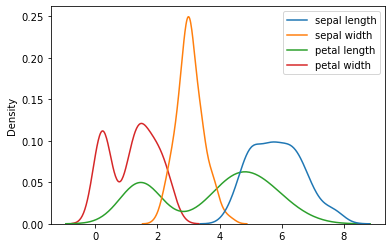

In [36]:
sns.kdeplot(data=iris)

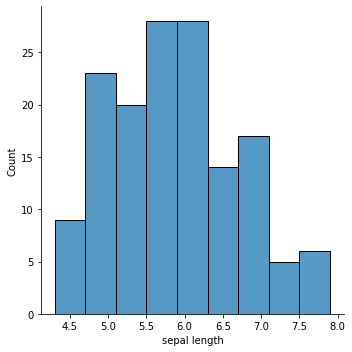

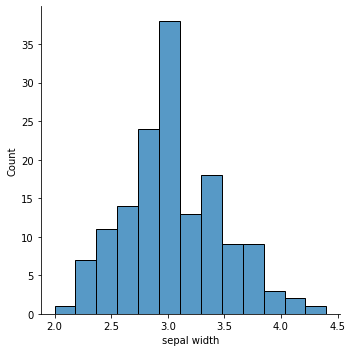

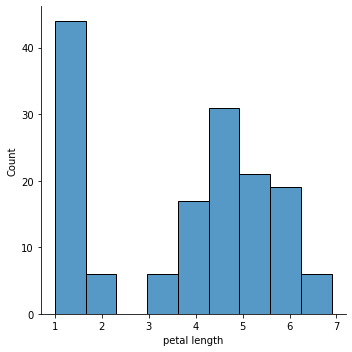

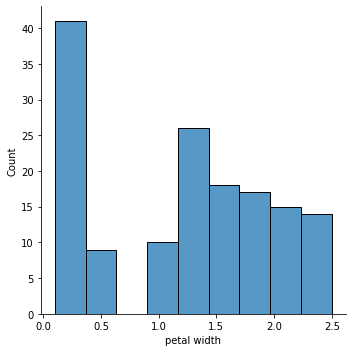

In [37]:
for column in iris:
    sns.displot(iris[column])

# Ответ
- Petal length имеет наибольший размах значений
- Sepal width и sepal length имеют унимодальное распределение
- Petal width и petal length имеют бимодальное распределение 

# Вопрос
Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violin плотом. Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта с помощью violin плота и выберите правильный (такой же) вариант среди предложенных

Мануал по рисованию [violin плотов](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

<AxesSubplot:ylabel='petal length'>

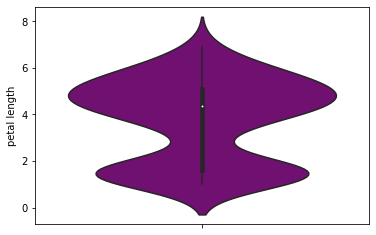

In [123]:
sns.violinplot(y=iris['petal length'], color="Purple")

# Вопрос

Продолжаем изучение ирисов! Ещё один важный тип графиков - pairplot, отражающий зависимость пар переменных друг от друга, а также распределение каждой из переменных. Постройте его и посмотрите на scatter плоты для каждой из пар фичей. Какая из пар навскидку имеет наибольшую корреляцию?

Также обратите внимание, что можно разделить на группы с помощью параметра hue.

Ссылки для изучения:

[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

In [38]:
iris = pd.read_csv('data/iris.csv', index_col=0)

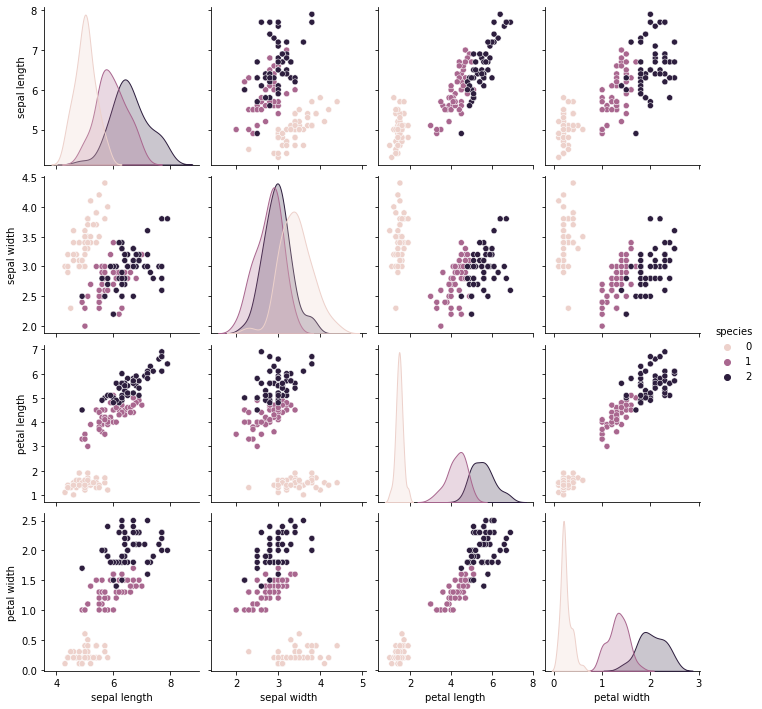

In [39]:
sns.pairplot(iris, hue="species")

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


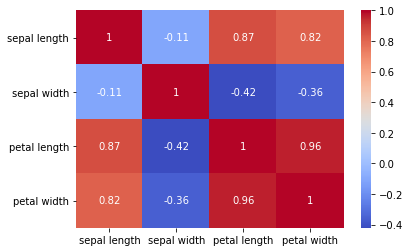

In [40]:
sns.heatmap(iris.drop('species', axis=1).corr(), annot=True, cmap= 'coolwarm');
iris.drop('species', axis=1).corr()